# Project-8:Flight Price Prediction

Problem Statement:
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
Size of training set: 10683 records
Size of test set: 2671 records
    
FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket
 
OBJECTIVE:To build a machine learning model to predict the price of the flight ticket. 
Target varibale: Price is the target variable   


In [1]:
#loading the required libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score

In [2]:
import pandas as pd
df_train=pd.read_excel('Data_train.xlsx') #Dataset in excel format
df_test=pd.read_excel('Test_set.xlsx') #Dataset in excel format

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


The training dataset has 10683 rows and 11 columns.

In additional information,it showing no_info,we may delete this column later.

Price is our target column which is continuous ,so this is regression problem.

In [5]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


 The testing dataset contains 2671 rows and 10 columns .
 
The additional information column showing no info and informtaion contain is irrelevant ,so we can delete this column.

Here we will predict the target variable which is "price" 

In [6]:
df_train.shape    #Checking the dimensions of the training dataset


(10683, 11)

In [7]:
df_test.shape #Checking the dimensions of the testing dataset


(2671, 10)

# EDA FOR TRAINING DATA SET

In [8]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Thus we see that there are 10 categorical columns and one numerical column "Price" which is our target varaible.

# Converting the date_of_journey which is given as object to datetime format

In [9]:
# Extracting day and month from Date_of_Journey and then dropping the Date of journey
df_train['travel_day'] = pd.to_datetime(df_train.Date_of_Journey,format ='%d/%m/%Y').dt.day
df_train['travel_month'] = pd.to_datetime(df_train.Date_of_Journey,format ='%d/%m/%Y').dt.month
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [10]:
df_train.head(5) #validating the date of journey changed to journey_month and journey_day

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# Converting Dep_Time into Datetime and extracting hours and min from it.

In [11]:
# Extracting hour and min from Depature Time and then dropping the Depature Time
df_train['dep_hour'] = pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['dep_min'] = pd.to_datetime(df_train.Dep_Time).dt.minute
df_train.drop(['Dep_Time'],axis=1,inplace=True)

In [12]:
df_train.head(5) #validating dep_time

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


# Converting Arrival_Time into Datetime and extracting hours and min from it.

In [13]:
# Extracting hour and min from Arrival_Time and then dropping the Arrival_Time
df_train['arr_hour'] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['arr_min'] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [14]:
df_train.head(5) #validating arrival_time

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [15]:
df_train.duplicated().sum() #dropping dulicated records

222

In [16]:
df_train.drop_duplicates(inplace=True ) #dropping the duplicate records

Dropping the route column and duration column as in case of route we have source and destination records 
available so its unneccsaary to keep route column .in case of duration ,we have depature_time and arrival_time recors availbale in the 
form of hours and minutes each,whcih we pretty determine the duration.so keep the duration will create unnesscary compuational cost.

In [17]:
df_train=df_train.drop(['Route','Duration'],axis=1)   

In [18]:
df_train.columns #after data cleaning we have 12 columns in the training data set

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Price', 'travel_day', 'travel_month', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min'], dtype='object')

In [19]:
#checking missing value
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
travel_day         0
travel_month       0
dep_hour           0
dep_min            0
arr_hour           0
arr_min            0
dtype: int64

<AxesSubplot:>

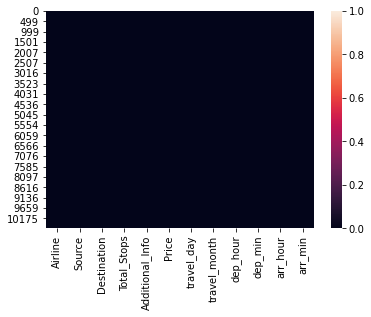

In [20]:
#Missing value checking using heatmap
sns.heatmap(df_train.isnull()) 

Thus we see there is one each missing value in route and total_stops which we can delete or impute.whereas from heatmap it is not observed may be its neglible.

In [21]:
#dropping misiing value as its very less
df_train.dropna(inplace=True)

In [22]:
df_train.isnull().sum() #validating missing value

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
travel_day         0
travel_month       0
dep_hour           0
dep_min            0
arr_hour           0
arr_min            0
dtype: int64

In [23]:
df_train.describe(include=np.object) ## description of the categorical features

,Airline,Source,Destination,Total_Stops,Additional_Info
count,10460,10460,10460,10460,10460
unique,12,5,6,5,10
top,Jet Airways,Delhi,Cochin,1 stop,No info
freq,3700,4345,4345,5625,8180


No missimg value as it has been dropped.



In [24]:
df_train.describe()

,Price,travel_day,travel_month,dep_hour,dep_min,arr_hour,arr_min
count,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000
mean,9027.360421,13.463193,4.701816,12.476673,24.406310,13.390057,24.723231
std,4625.057376,8.467058,1.163676,5.726244,18.816989,6.854048,16.570287
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,5224.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,8266.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,12346.250000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


# Univariate Analysis for categorical columns:Training dataset


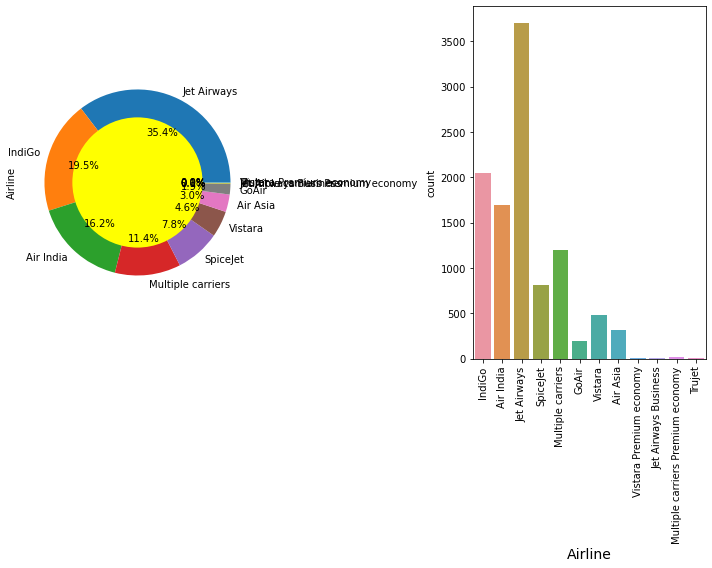

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_train['Airline'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Airline' , data=df_train)
plt.xlabel('Airline', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_train['Airline'].value_counts()





Thus we see Jet airways has highest number of records about 35.4% followed by Indigo (19.5%).Air Passenger are preffering the jet airways the most.

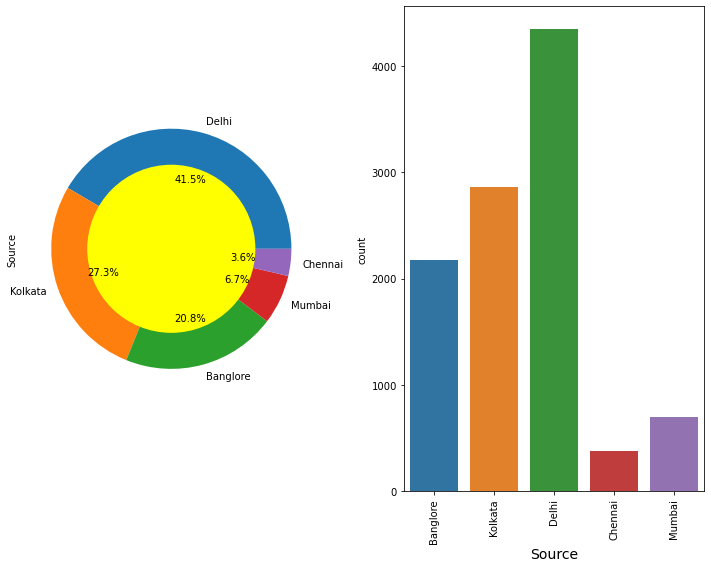

Delhi       4345
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_train['Source'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Source' , data=df_train)
plt.xlabel('Source', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_train['Source'].value_counts()

Thus we see Mostly people around 41.5% are boarding from Delhi and least is Chennai (3.6%).

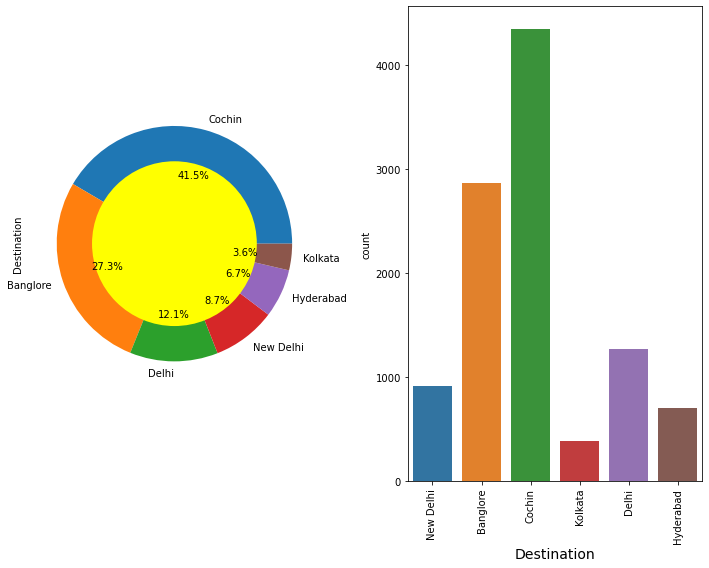

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_train['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Destination' , data=df_train)
plt.xlabel('Destination', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_train['Destination'].value_counts()

Thus we see most people around 41.5% are travelling to Cochin followed by bangalore (27.3%) and least is Kolkata(3.6%).

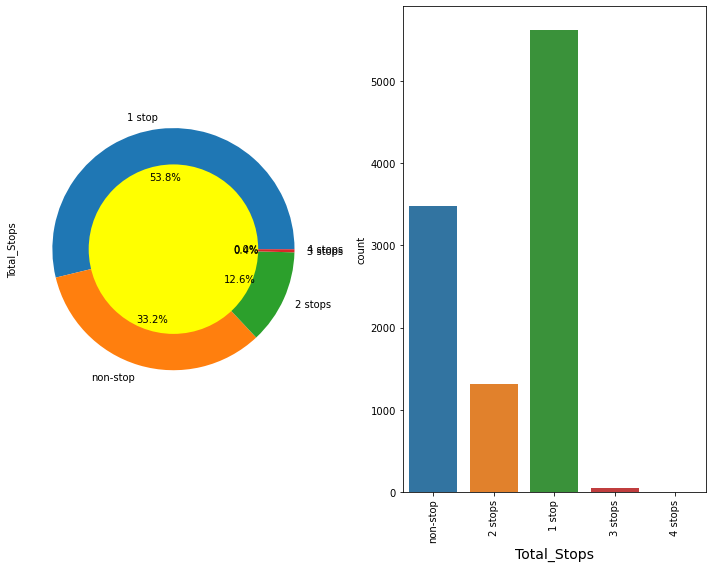

1 stop      5625
non-stop    3473
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_train['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Total_Stops' , data=df_train)
plt.xlabel('Total_Stops', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_train['Total_Stops'].value_counts()

Thus we see that 1 stop route comprises 53.8% records and least is 4 stops ,people preferring one stop route followed by non stop


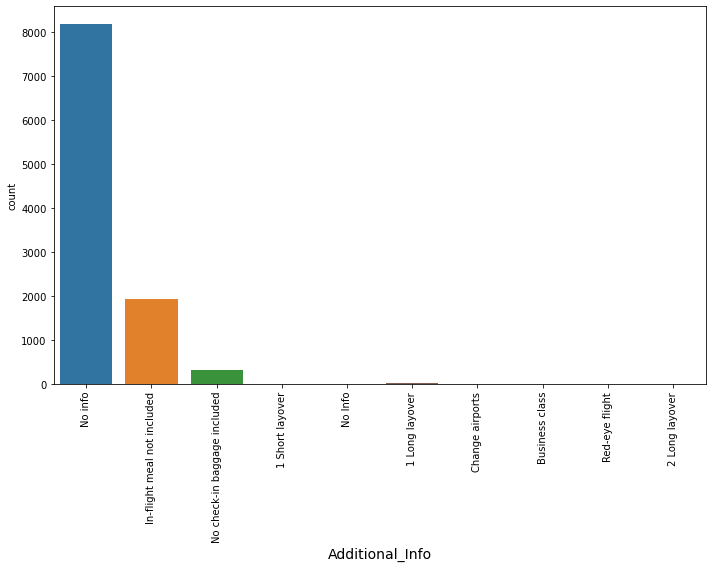

No info                         8180
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x='Additional_Info' , data=df_train)
plt.xlabel('Additional_Info', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_train['Additional_Info'].value_counts()

Thus we see highest record contains no information ,which is followed by in-flight meal not included and least is 1 short layover.

10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
10759      1
6878       1
6633       1
19172      1
4098       1
Name: Price, Length: 1870, dtype: int64

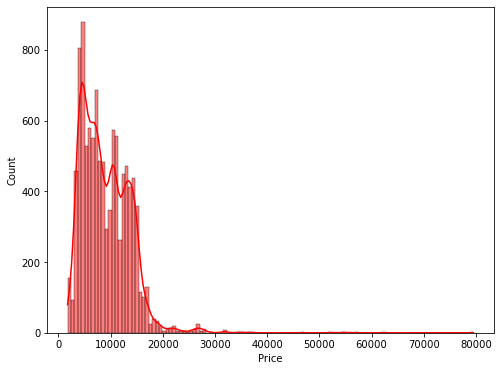

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(df_train['Price'],kde=True,color='r')
df_train['Price'].value_counts()


Most of the price for flights lie in the range 2000 to 20000

# Bivariate Analysis/Multivariate Analysis 

Comparing Price vs Airline 

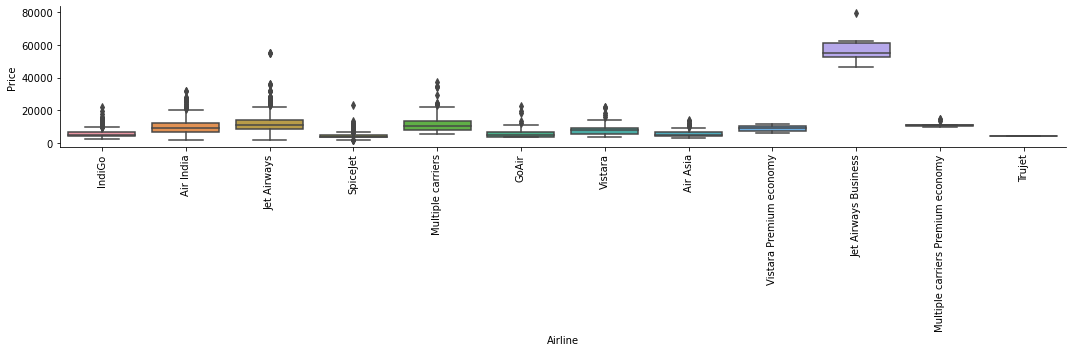

In [31]:
sns.catplot(y="Price", x = "Airline", data = df_train, kind="box", height =5, aspect = 3)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This shows that Jet airways is having high price .

comparing price vs Source

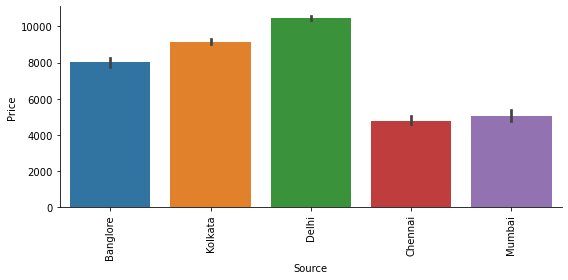

In [32]:
sns.catplot(y="Price", x = "Source", data = df_train, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Maximum People boarding from Delhi and they afford to pay high price followed by kolkata and least is chennai.

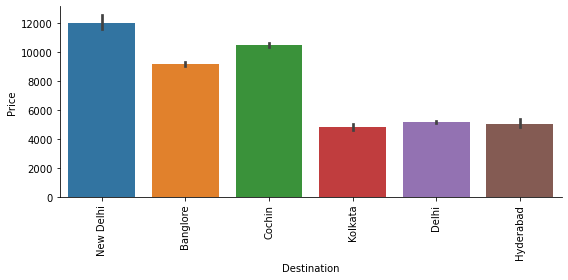

In [33]:
sns.catplot(y="Price", x = "Destination", data = df_train, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Majority of flight landed to Delhi ,they can afford to pay high price followed by cochin.least is kolkata.There are two values may be new delhi and old delhi .

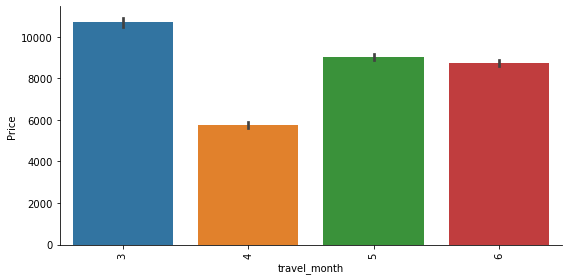

In [34]:
sns.catplot(y="Price", x = "travel_month", data = df_train, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Majority of the flight travel in the 3rd month that is March where the price is very high.

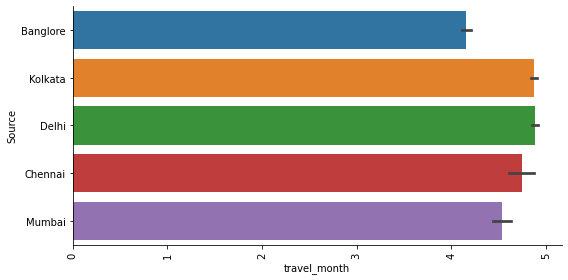

In [35]:
sns.catplot(y="Source", x = "travel_month", data = df_train, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Majority of the flight source is kolkata and delhi between the 4th month and 5th month. 

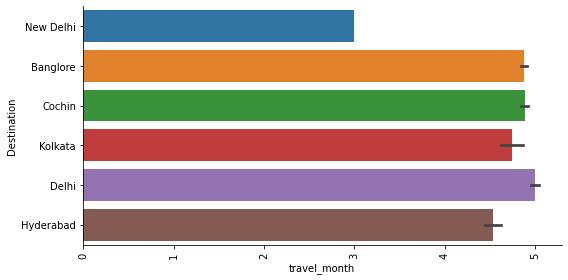

In [36]:
sns.catplot(y="Destination", x = "travel_month", data = df_train, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Majority of the flight's destination is Bangalore,cochin and delhi during 5th month

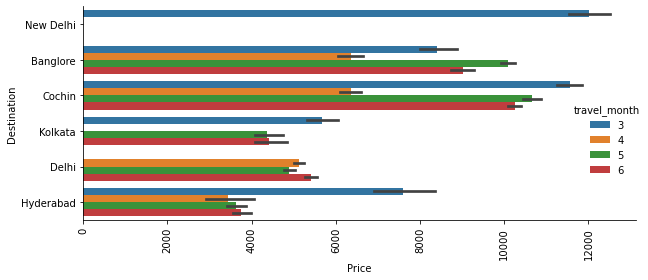

In [37]:
sns.catplot(y="Destination", x = "Price", hue="travel_month",data = df_train, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Majority of the flight's destination is New delhi during the 3rd Month followed by cochin and the price is high during that month.

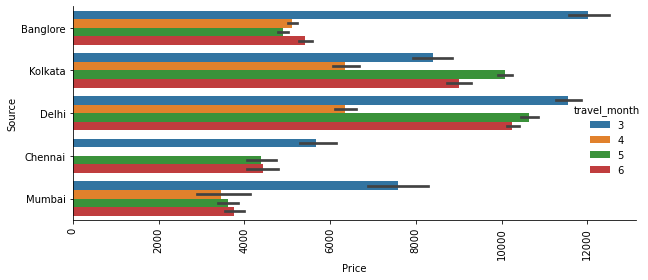

In [38]:
sns.catplot(y="Source", x = "Price", hue="travel_month",data = df_train, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Majority of the flight source is from Bangalore followed by delhi during 3rd month and the price even touched to 12000.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

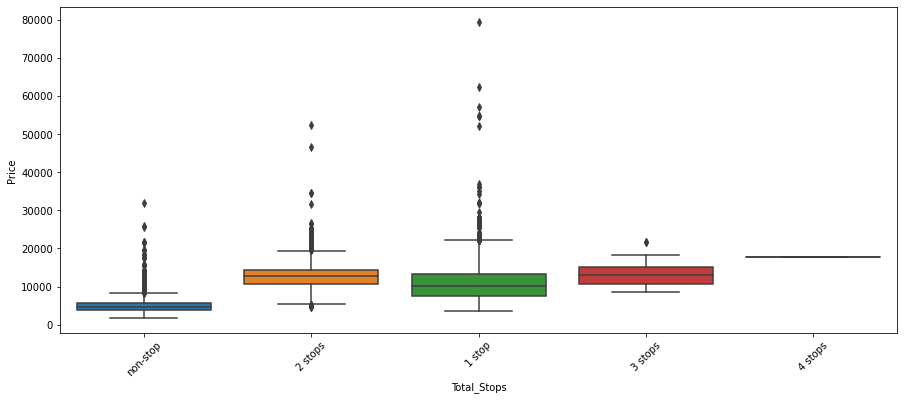

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Total_Stops',y='Price',data=df_train)
plt.xticks(rotation=45)

Those flights having one-stop having low price and those with 2 stops has high price.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

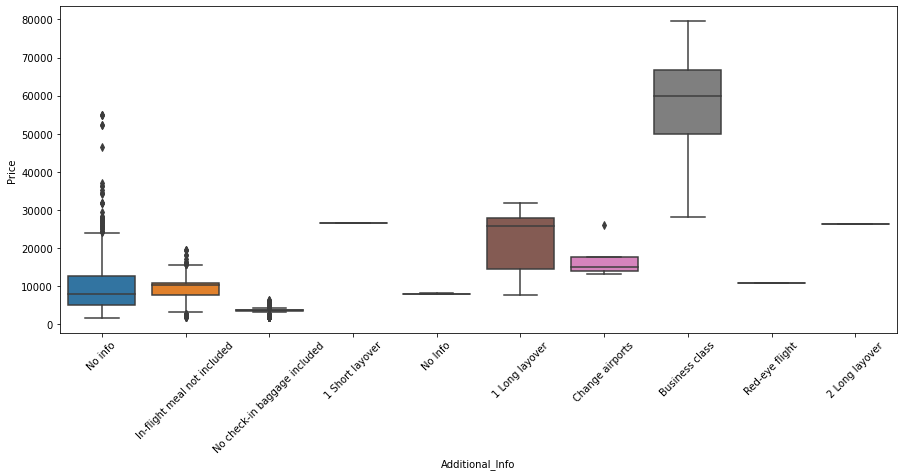

In [40]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Additional_Info',y='Price',data=df_train)
plt.xticks(rotation=45)

Businness class is having average mean high price than the rest.Most of the flights dont provide additional information.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

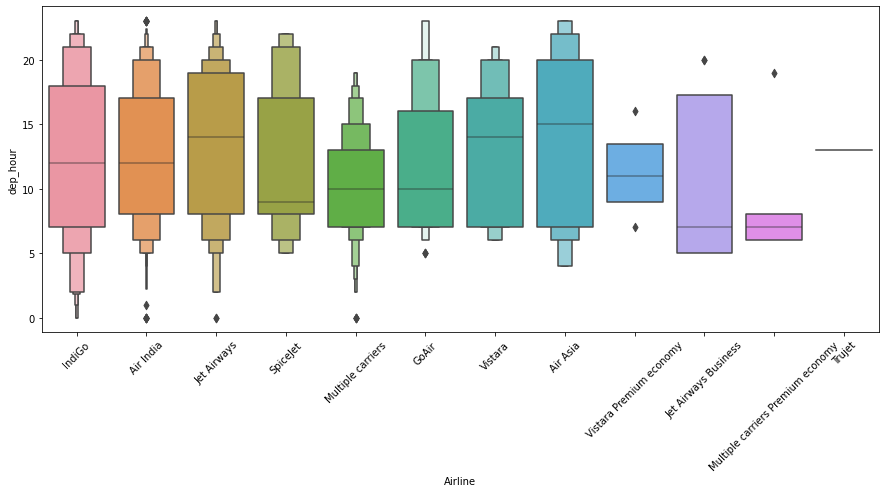

In [41]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Airline',y='dep_hour',data=df_train)
plt.xticks(rotation=45)

Departure hour is maximum for flight air asia thatmis 15 hours approx followed by jet airways is between 10-15hours.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

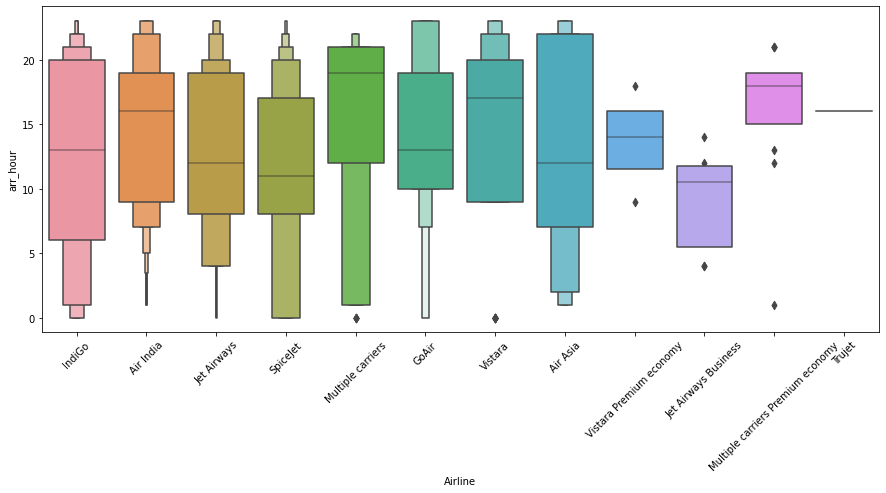

In [42]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Airline',y='arr_hour',data=df_train)
plt.xticks(rotation=45)

Spice jet and vistara premium economy has less arrival time

<AxesSubplot:xlabel='Source', ylabel='count'>

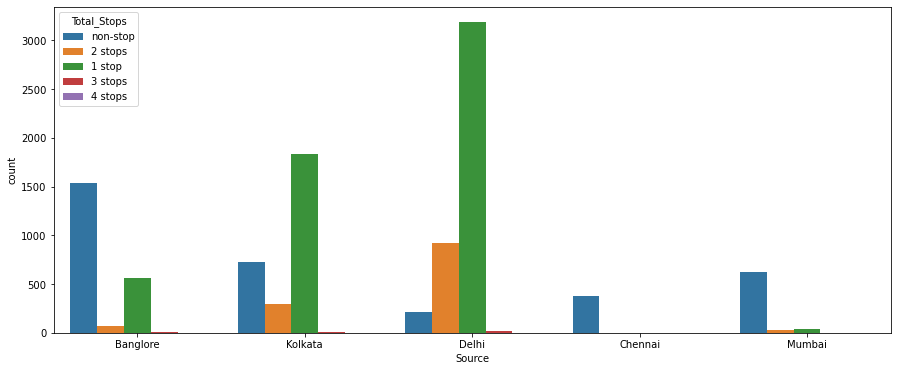

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Source'],hue='Total_Stops',data=df_train)

majority of flight having source as delhi has only 1 stop.Non stop flight is having source from chennai.Non-stop flights are 
covering all the source.Almost all the flights from chennai have no stops.

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

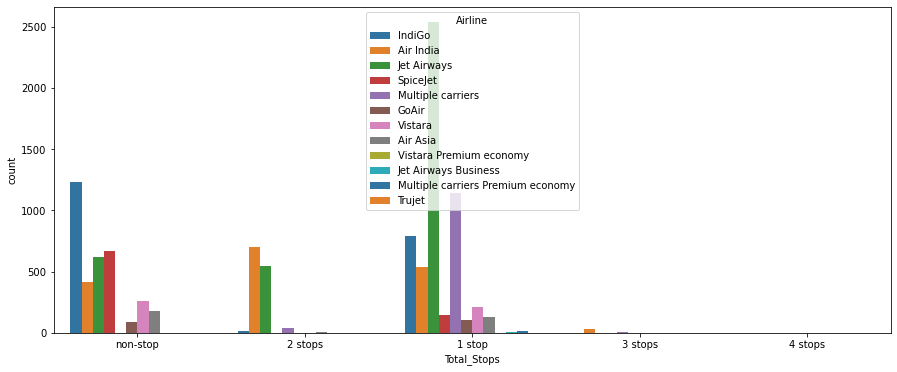

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Total_Stops'],hue='Airline',data=df_train,palette='tab10')

Jet airways has non_stop,2 stop and maximum one stop.Most of the flights are non_stop.

<AxesSubplot:xlabel='Destination', ylabel='count'>

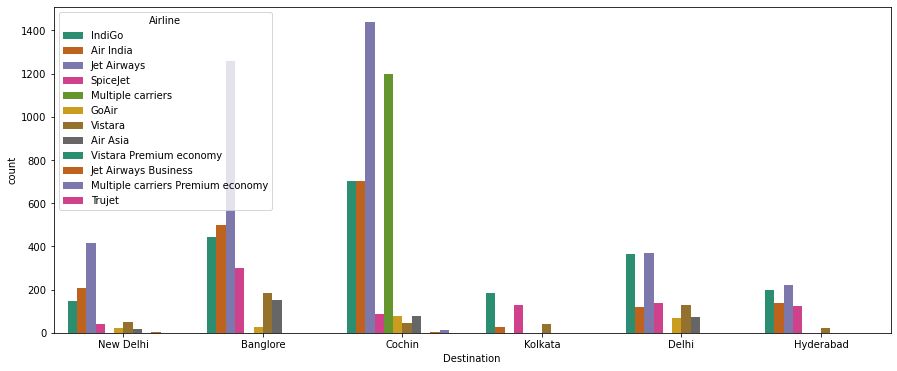

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Destination'],hue='Airline',data=df_train,palette='Dark2')

Majority of the jet airways flights has destination at Cochin.Kolkata has the least.

<AxesSubplot:xlabel='Source', ylabel='count'>

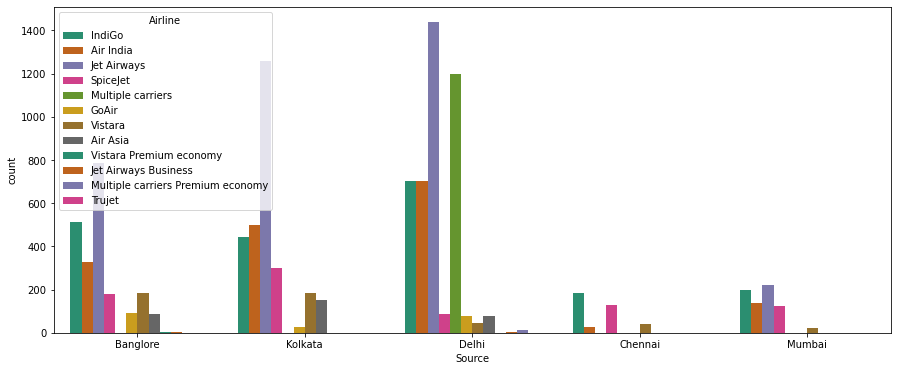

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Source'],hue='Airline',data=df_train,palette='Dark2')

Mojoriy of the jeta airwys flight having source as Delhi followed by kolkata.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

<Figure size 1080x432 with 0 Axes>

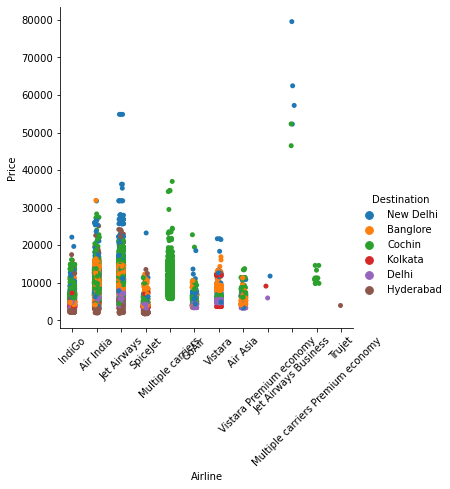

In [47]:
plt.figure(figsize=(15,6))
sns.catplot(x='Airline',y='Price',hue='Destination',data=df_train)
plt.xticks(rotation=45)

Highest price is charged by jet airways be it bussiness or not while having its destination as Bangalor.Trujet has only
one destination,

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

<Figure size 1080x432 with 0 Axes>

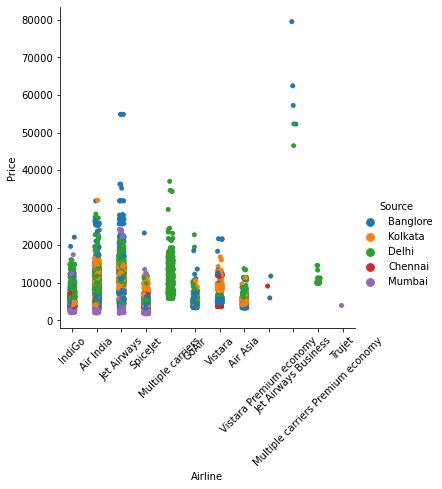

In [48]:
plt.figure(figsize=(15,6))
sns.catplot(x='Airline',y='Price',hue='Source',data=df_train)
plt.xticks(rotation=45)

Thus we can see Jet airways having source at Mumbai is charging very high price where the price is above 30000.
Trujet has only one source as mumbai.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

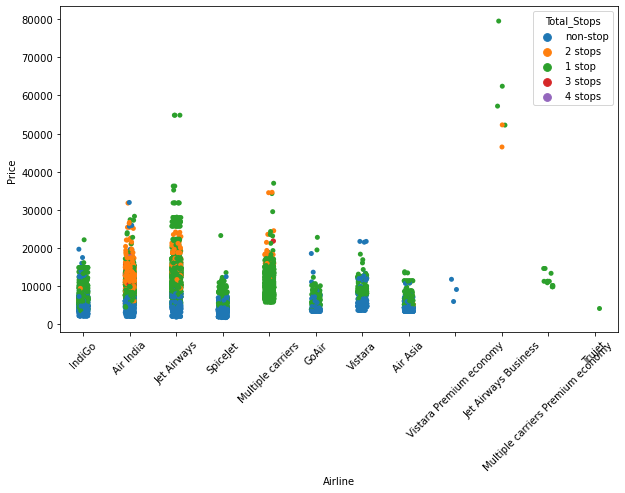

In [49]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Airline',y='Price',hue='Total_Stops',data=df_train)
plt.xticks(rotation=45)

Non stop flights are cost less.Those flights which have one stop or two stops are price higher.Jet airways 
is having maximum one stop where price is above 30000.Trujet is haing only one stop.Multiple carriers is not
having any non stop flights.

<AxesSubplot:xlabel='Source', ylabel='Price'>

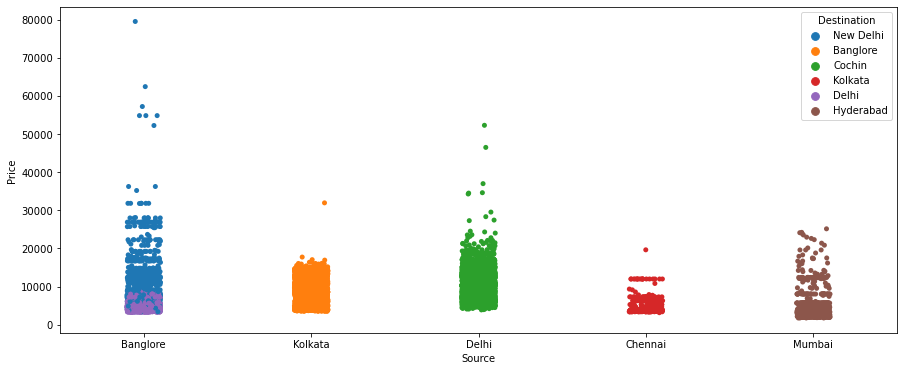

In [50]:
plt.figure(figsize=(15,6))
sns.stripplot(x='Source',y='Price',hue='Destination',data=df_train)

Bangalore Flight which is having destination at Delhi having flight tickets above 30000.Least is Chenna Flight having
destination at kolkata is having flight ticket less than 20000.Thus its depends upon the distance coverage also.The more the distance 
between source and destination ,more the price.

<AxesSubplot:xlabel='arr_hour', ylabel='Price'>

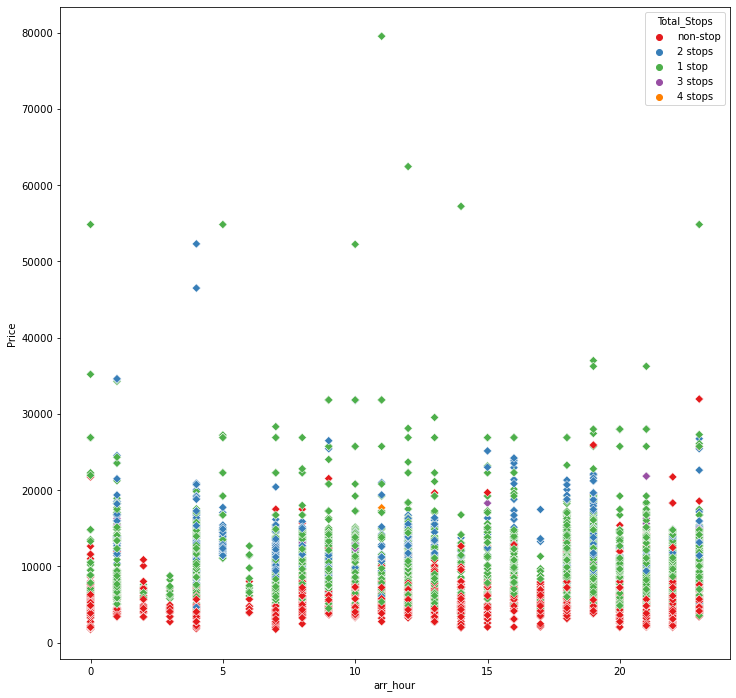

In [51]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='arr_hour',y='Price',hue='Total_Stops',data=df_train,marker='D',palette='Set1')

Those which have non_stop flight are having flight tickets cheap and the price is somewht less than 10000 in most cases.
Those flights having one stop or two stop having flight tickets expensive and price having more than 10k in most of the cases.


<AxesSubplot:xlabel='Price', ylabel='Density'>

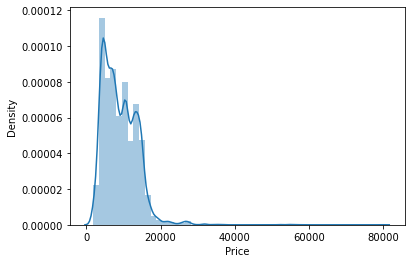

In [52]:
sns.distplot(df_train['Price'])

Our target column is right skewed ,as this is our label ,so we will leave it as it is

<AxesSubplot:xlabel='travel_day', ylabel='Density'>

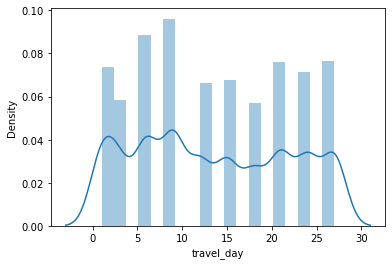

In [53]:
sns.distplot(df_train['travel_day'])

This is near to normal distribution

<AxesSubplot:xlabel='dep_hour', ylabel='Density'>

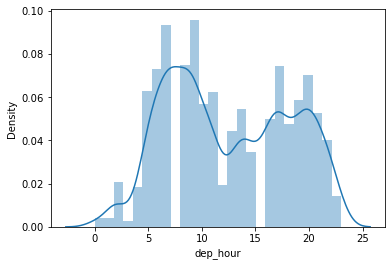

In [54]:
sns.distplot(df_train['dep_hour'])

This is bimodal distribution.skewness is there.

<AxesSubplot:xlabel='dep_min', ylabel='Density'>

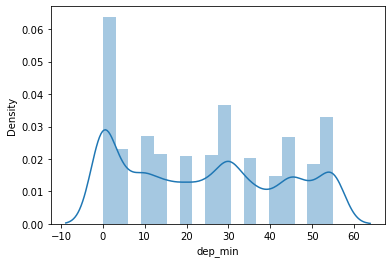

In [55]:
sns.distplot(df_train['dep_min'])

Slight skewness is there.

<AxesSubplot:xlabel='arr_hour', ylabel='Density'>

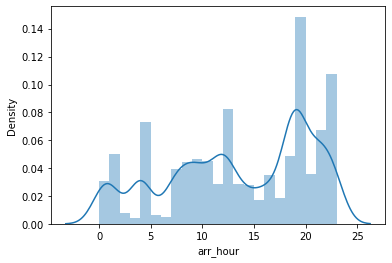

In [56]:
sns.distplot(df_train['arr_hour'])

This is a multimodal distribution

<AxesSubplot:xlabel='arr_min', ylabel='Density'>

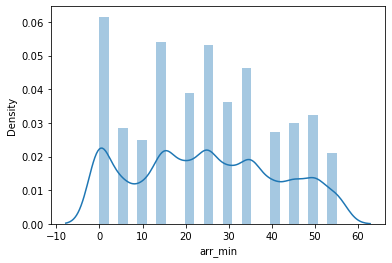

In [57]:
sns.distplot(df_train['arr_min'])

This is also multimodal distribution.

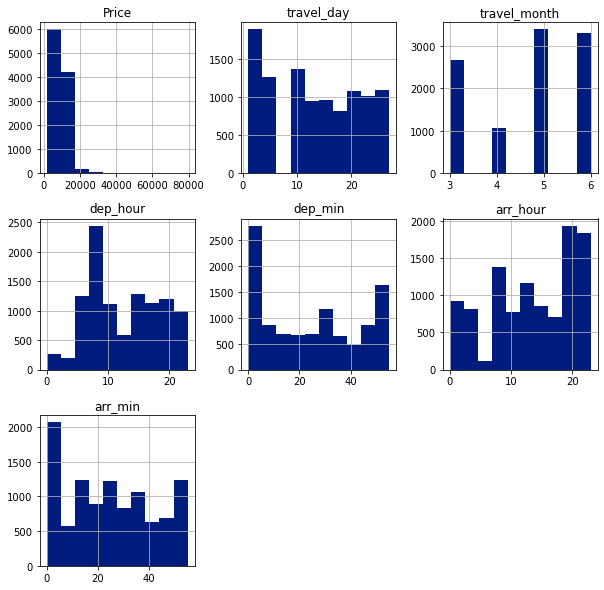

In [58]:
plt.style.use('seaborn-dark-palette')
df_train.hist(figsize=(10,10))
plt.show()

Thus we see histogram represnts the frequency distribution of each coluumn.It shows  some are close to normal distribution,
some are multimodial distribution and some have bimodal distribution.

Encoding of categorical column 

In [59]:
oe=OrdinalEncoder()
def ordinal_encoder(df, col):
    df[col]=oe.fit_transform(df[col])
    return df

df_train=ordinal_encoder(df_train,['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'])

In [60]:
df_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,travel_day,travel_month,dep_hour,dep_min,arr_hour,arr_min
0,3.0,0.0,5.0,4.0,8.0,3897,24,3,22,20,1,10
1,1.0,3.0,0.0,1.0,8.0,7662,1,5,5,50,13,15
2,4.0,2.0,1.0,1.0,8.0,13882,9,6,9,25,4,25
3,3.0,3.0,0.0,0.0,8.0,6218,12,5,18,5,23,30
4,3.0,0.0,5.0,0.0,8.0,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,4.0,8.0,4107,9,4,19,55,22,25
10679,1.0,3.0,0.0,4.0,8.0,4145,27,4,20,45,23,20
10680,4.0,0.0,2.0,4.0,8.0,7229,27,4,8,20,11,20
10681,10.0,0.0,5.0,4.0,8.0,12648,1,3,11,30,14,10


<AxesSubplot:>

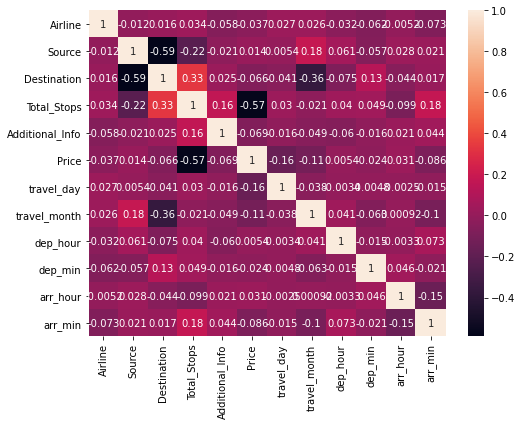

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(),annot=True)

Price has positive correlation with arr_hour,dep_hour ,there is no multicollinerity in the train dataset.
Destination is positively correlated with total_stops at 51%.There is no strong collineraity exists.

In [62]:
#Delhi in destination column
df_train['Destination'].replace('New Delhi','Delhi',inplace=True)

Airline               AxesSubplot(0.125,0.125;0.0545775x0.755)
Source             AxesSubplot(0.190493,0.125;0.0545775x0.755)
Destination        AxesSubplot(0.255986,0.125;0.0545775x0.755)
Total_Stops        AxesSubplot(0.321479,0.125;0.0545775x0.755)
Additional_Info    AxesSubplot(0.386972,0.125;0.0545775x0.755)
Price              AxesSubplot(0.452465,0.125;0.0545775x0.755)
travel_day         AxesSubplot(0.517958,0.125;0.0545775x0.755)
travel_month       AxesSubplot(0.583451,0.125;0.0545775x0.755)
dep_hour           AxesSubplot(0.648944,0.125;0.0545775x0.755)
dep_min            AxesSubplot(0.714437,0.125;0.0545775x0.755)
arr_hour            AxesSubplot(0.77993,0.125;0.0545775x0.755)
arr_min            AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

<Figure size 2160x0 with 0 Axes>

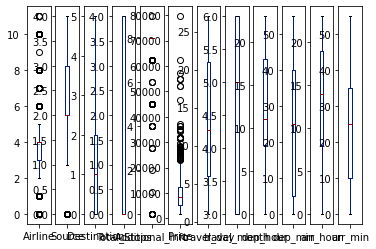

In [63]:
plt.figure(figsize=(30,0))
df_train.plot(kind ='box',subplots = True,sharex = False)

We can see outliers in the target variable and categorical column. We leave outliers for target variable and categorical column and be as it is..

Text(0.5, 1.0, 'correlation')

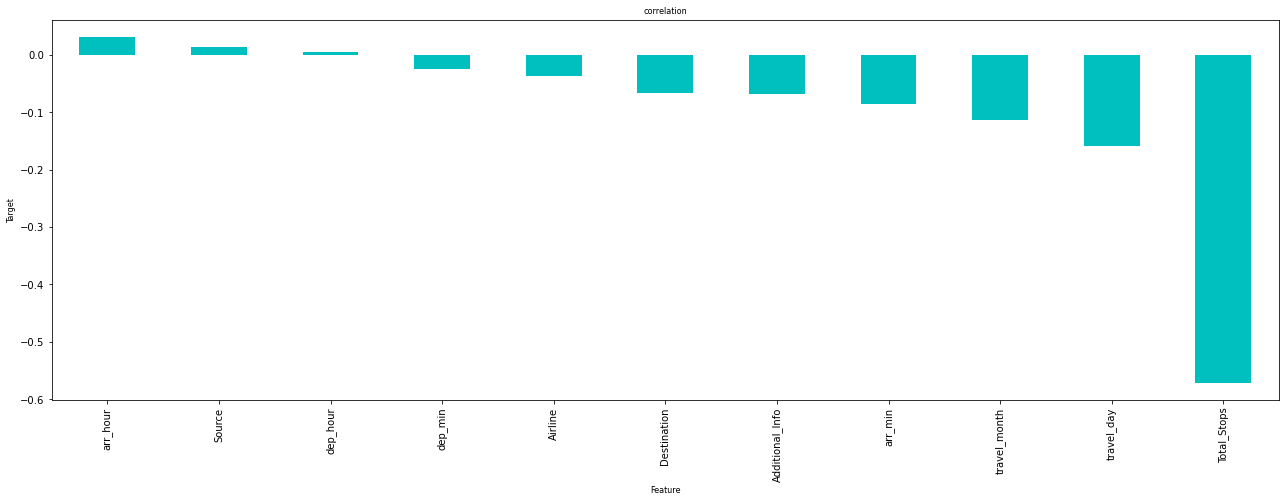

In [64]:
plt.figure(figsize=(22,7))
df_train.corr()['Price'].sort_values(ascending=False).drop(["Price"]).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=8)
plt.ylabel("Target",fontsize=8)
plt.title('correlation',fontsize=8)  

Thus we see that price is dependent on arr_hour,source ,dep_hour and least is total stops.

Price column is right skewed but as it is a target column so we will leave as it is. 

In [65]:
df_train.dtypes

Airline            float64
Source             float64
Destination        float64
Total_Stops        float64
Additional_Info    float64
Price                int64
travel_day           int64
travel_month         int64
dep_hour             int64
dep_min              int64
arr_hour             int64
arr_min              int64
dtype: object

<AxesSubplot:xlabel='travel_month', ylabel='Density'>

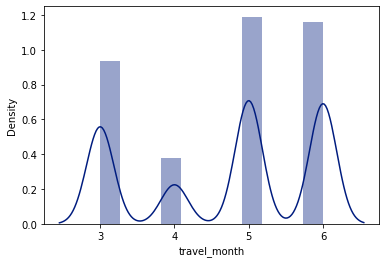

In [66]:
sns.distplot(df_train['travel_month'])

# EDA FOR TEST DATA SET

In [67]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [68]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

# Converting the date_of_journey which is given as object to datetime format

In [69]:
 # Extracting day and month from Date_of_Journey and then dropping the Date of journey
df_test['travel_day'] = pd.to_datetime(df_test.Date_of_Journey,format ='%d/%m/%Y').dt.day
df_test['travel_month'] = pd.to_datetime(df_test.Date_of_Journey,format ='%d/%m/%Y').dt.month
df_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [70]:
df_test.head(3) #validating changes been done

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,travel_day,travel_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5


# Converting Arrival_Time into Datetime and extracting hours and min from it.

In [71]:
# Extracting hour and min from Arrival_Time and then dropping the Arrival_Time
df_test['arr_hour'] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['arr_min'] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [72]:
df_test.head(3) #validating the arrival_time changes

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,travel_day,travel_month,arr_hour,arr_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,0


# Converting Dep_Time into Datetime and extracting hours and min from it.

In [73]:
# Extracting hour and min from Depature Time and then dropping the Depature Time
df_test['dep_hour'] = pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['dep_min'] = pd.to_datetime(df_test.Dep_Time).dt.minute
df_test.drop(['Dep_Time'],axis=1,inplace=True)

In [74]:
df_test.head(3)#validating the dep_time chnages

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,travel_day,travel_month,arr_hour,arr_min,dep_hour,dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15


In [75]:
df_test.columns #names of 10 features/columns names in the testing data set

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info', 'travel_day', 'travel_month', 'arr_hour', 'arr_min', 'dep_hour', 'dep_min'], dtype='object')

In [76]:
#checking missing value
df_test.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
travel_day         0
travel_month       0
arr_hour           0
arr_min            0
dep_hour           0
dep_min            0
dtype: int64

In [77]:
#Delhi in destination column
df_test['Destination'].replace('New Delhi','Delhi',inplace=True)

<AxesSubplot:>

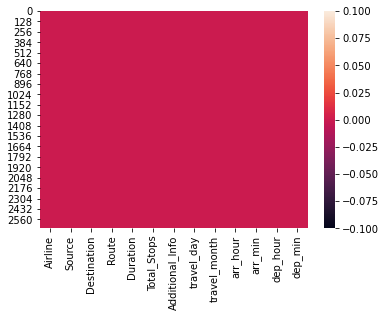

In [78]:
#Missing value checking using heatmap
sns.heatmap(df_test.isnull()) 

In the test data,there is no missing value. 

In [79]:
df_test.describe(include=np.object) # description of the categorcal features

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671
unique,11,5,5,100,320,5,6
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1 stop,No info
freq,897,1145,1145,624,122,1431,2148


1.There is no missing value which can be seen from count.

2.There are 11 disntict value in airline,5 distinct value in source ,6 disntinct value in destination,
there are 5 distinct stops,6 additional information.


In [80]:
df_test=df_test.drop(['Route','Duration'],axis=1)   

In [81]:
df_test.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,travel_day,travel_month,arr_hour,arr_min,dep_hour,dep_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,0,19,15


In [82]:
df_test.duplicated().sum() #finding duplicate values

29

In [83]:
#dropping the duplicate values
df_test.drop_duplicates(inplace=True ) #dropping the duplicate records

In [84]:
df_test.describe()

,travel_day,travel_month,arr_hour,arr_min,dep_hour,dep_min
count,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000
mean,12.915973,4.717638,13.589705,24.555261,12.623391,24.863740
std,8.268574,1.169368,7.025707,16.791057,5.677909,19.075082
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,8.000000,10.000000,8.000000,5.000000
50%,12.000000,5.000000,15.000000,25.000000,12.000000,25.000000
75%,21.000000,6.000000,19.000000,35.000000,18.000000,45.000000
max,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


Thus dataset is nearly normalised and very lightly skewed.

# Univariate Analysis for categorical columns:Testing dataset

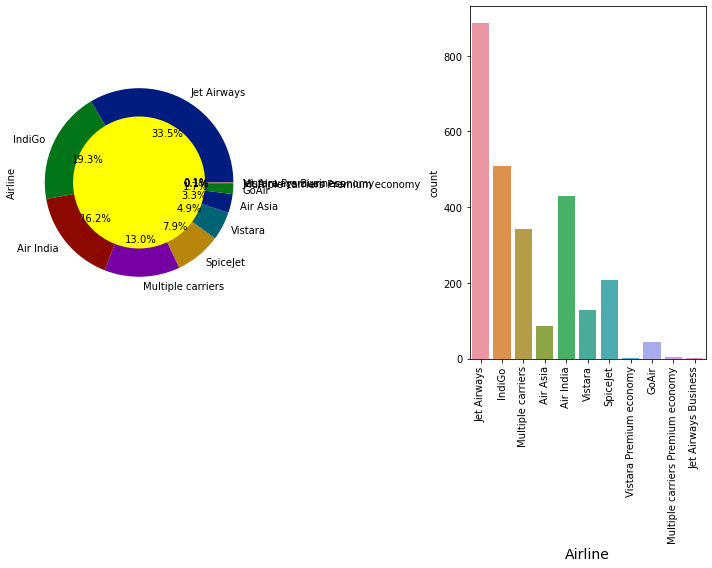

Jet Airways                          886
IndiGo                               509
Air India                            429
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [85]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_test['Airline'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Airline' , data=df_test)
plt.xlabel('Airline', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_test['Airline'].value_counts()


Thus we see jet airways shows the highest number of records followed by Indigo.

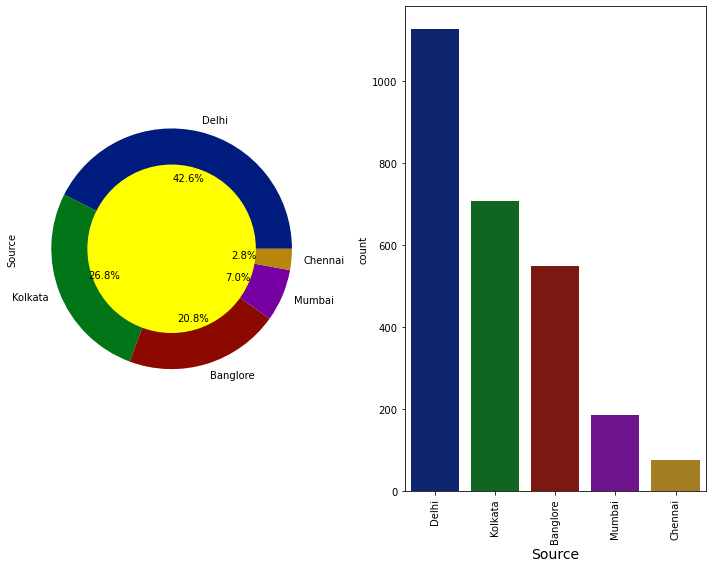

Delhi       1125
Kolkata      707
Banglore     549
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [86]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_test['Source'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Source' , data=df_test)
plt.xlabel('Source', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_test['Source'].value_counts()

Delhi as a source flight shows highest number of records i.e 42.9% followed by kolkata at 26.6%.  

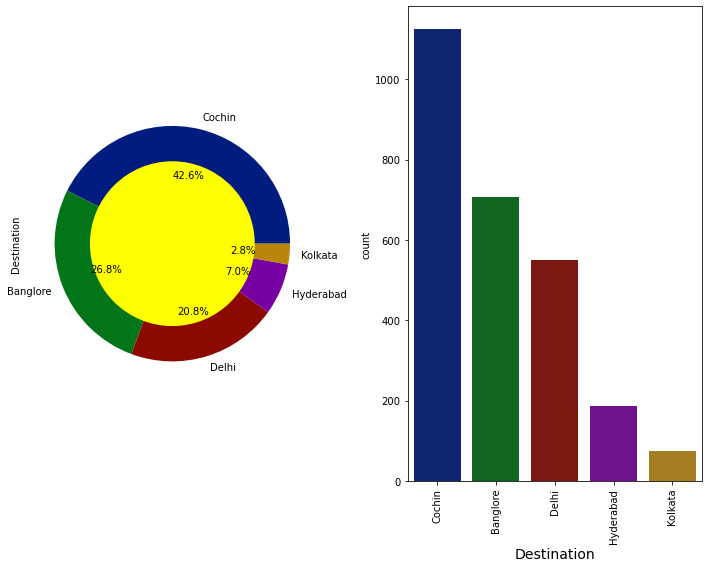

Cochin       1125
Banglore      707
Delhi         549
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [87]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_test['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Destination' , data=df_test)
plt.xlabel('Destination', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_test['Destination'].value_counts()

Thus most of the flights having the destination as Cochin about 42.9% followed by Bangalore at 26.6%

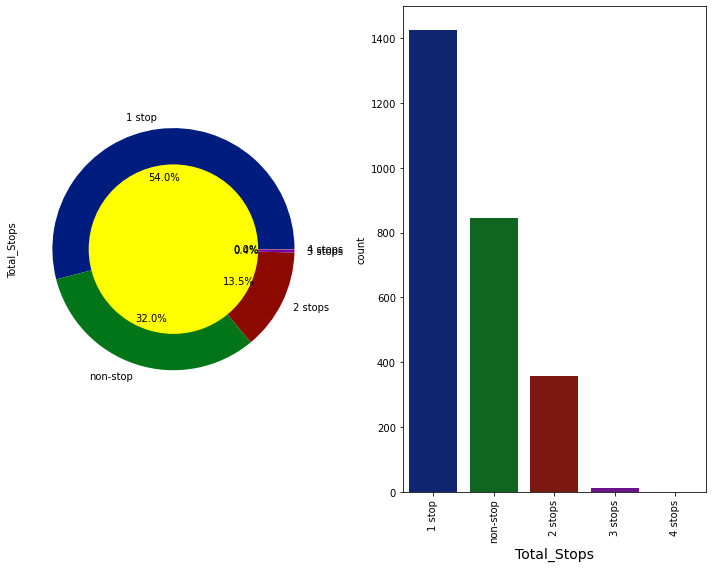

1 stop      1427
non-stop     846
2 stops      357
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [88]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_test['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Total_Stops' , data=df_test)
plt.xlabel('Total_Stops', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_test['Total_Stops'].value_counts()

Those flights which are having only one stop shows highest number of records(53.6%) followed by non_stpp flights(31.8%).

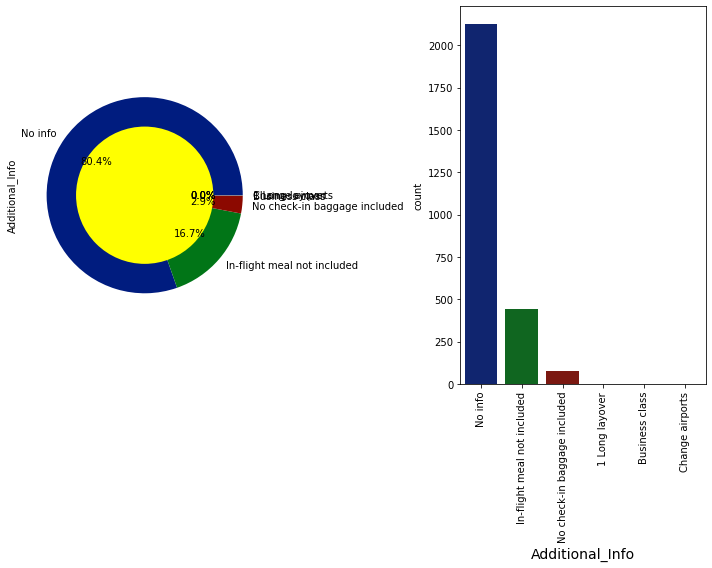

No info                         2123
In-flight meal not included      440
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [89]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df_test['Additional_Info'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Additional_Info' , data=df_test)
plt.xlabel('Additional_Info', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df_test['Additional_Info'].value_counts()

Most of the flights dont provide any information. In-flight meal not included comprises of 16.6%.

# Bivariate Analysis/Multivariate Analysis

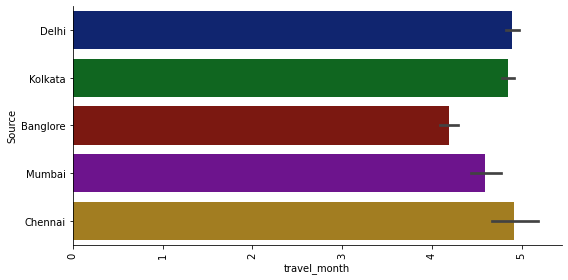

In [90]:
sns.catplot(y="Source", x = "travel_month", data = df_test ,kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As per testing set data,Majority of the airline flight travel between 4th and 5th month.

<AxesSubplot:xlabel='Source', ylabel='count'>

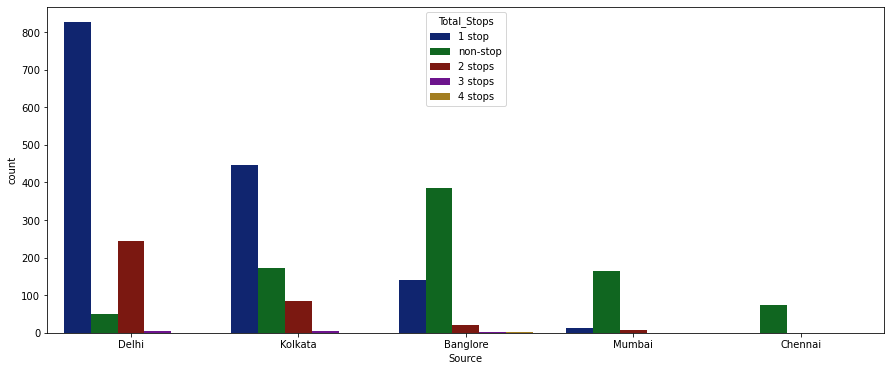

In [91]:
plt.figure(figsize=(15,6))
sns.countplot(df_test['Source'],hue='Total_Stops',data=df_test)

majority of flight as delhi being the boarding option has only 1 stop.
Non-stop flights are covering all the source.Almost all the flights from chennai have no stops.

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

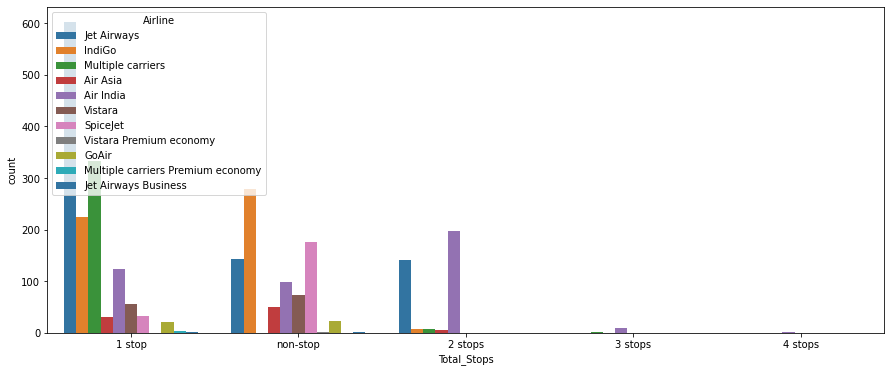

In [92]:
plt.figure(figsize=(15,6))
sns.countplot(df_test['Total_Stops'],hue='Airline',data=df_test,palette='tab10')

Majority of Jet airways has one stop,and also it has non_stop.Almost all the flights are having 1 stop.
Air India has 3 stops and also 4 stops due to this people are preferring less air india.For 2 stops,people are prefffering Air India.

<AxesSubplot:xlabel='Destination', ylabel='count'>

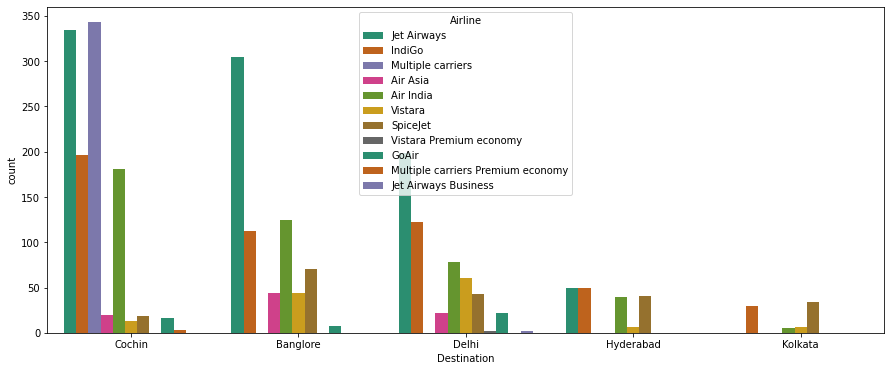

In [93]:
plt.figure(figsize=(15,6))
sns.countplot(df_test['Destination'],hue='Airline',data=df_test,palette='Dark2')

Most of the flights are landing to cochin as preffered destination as it is a important tourist place of Karela  and having historical and 
colonial significance.People prefer jet airways and multiple carriers the most to go to cochin. Next place people prefer for destination
 is Bangalore as it is “Silicon Valley of India” (or “IT capital of India”) because of its role as the nation's leading information technology (IT) exporter.
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'SpiceJet'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'GoAir'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Jet Airways Business')])

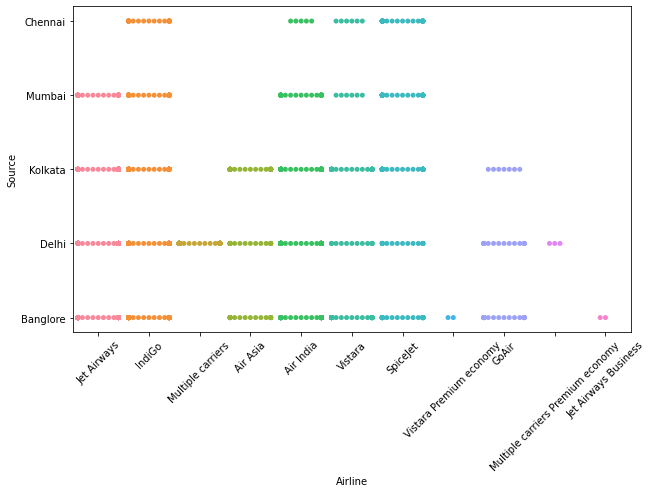

In [94]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Airline',y='Source',data=df_test)
plt.xticks(rotation=45)

Thus we see that Indigo,Air india,Vistara and Spice jet covers all the source.Jet airways dont cover chennai as source.Multiple
carriers premium economy takes off from Delhi as source whereas jet airways business takes off from Bangalore only as originating 
source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'SpiceJet'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'GoAir'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Jet Airways Business')])

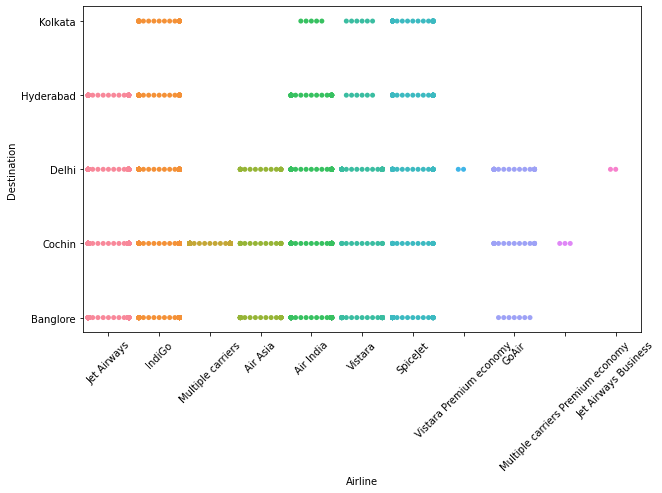

In [95]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Airline',y='Destination',data=df_test)
plt.xticks(rotation=45)

Indigo,Air india,Vistara,Spice jet covers all the destination.Jet airways dont have Kolkata as destination.Jet airways Business covers
Delhi as only destination.Multiple carriers premium economy covers Cochin as destination.Multiple carriers covers cochin as detsination.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'SpiceJet'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'GoAir'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Jet Airways Business')])

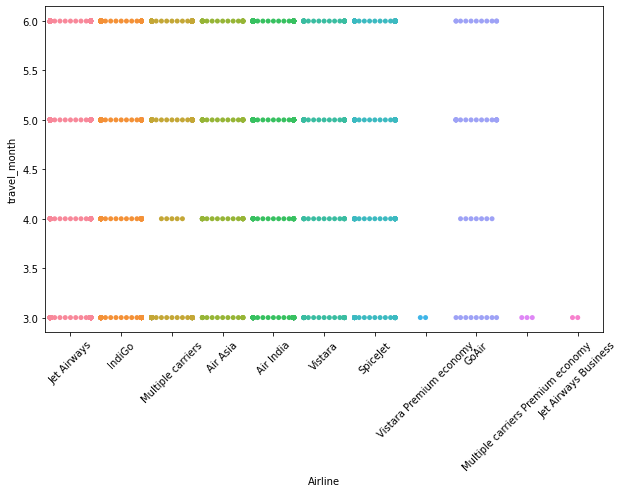

In [96]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Airline',y='travel_month',data=df_test)
plt.xticks(rotation=45)

Majority of  the airlines travels in the 3rd month,4th month,5thmonth,6th month.Vistara Premium economy,Multiple carriers premium economy and jet airways bussiness travels in 3rd month.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'SpiceJet'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'GoAir'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Jet Airways Business')])

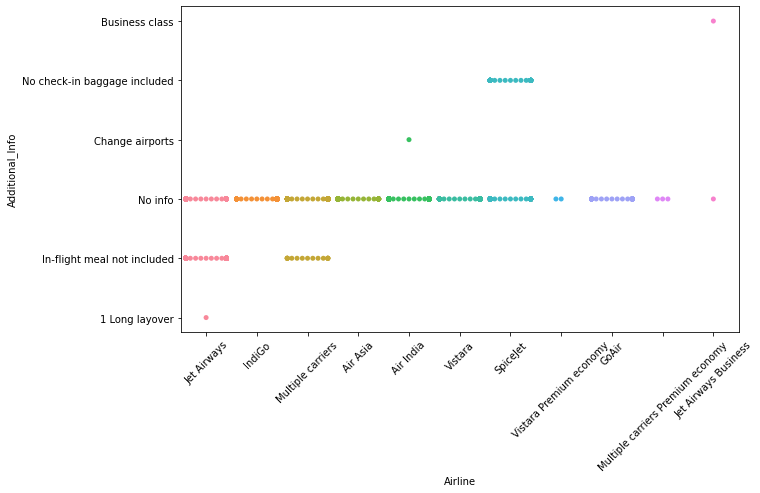

In [97]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Airline',y='Additional_Info',data=df_test)
plt.xticks(rotation=45)

Most of the airplines doesnt provide any information.Jet airways has one long layover,in-fligh meal not included.Air India has change airports.
Spicejet has no check-in baggage included.Jet airways business has business class.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Banglore'),
  Text(3, 0, 'Mumbai'),
  Text(4, 0, 'Chennai')])

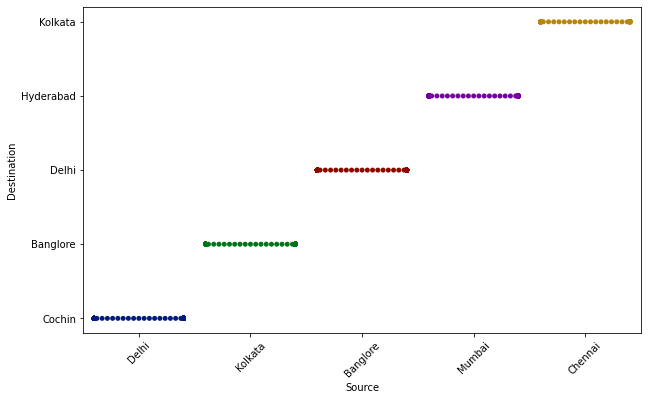

In [98]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Source',y='Destination',data=df_test)
plt.xticks(rotation=45)

Thus we see Delhi as a source having destination as cochin,kolkata as a source having destination as bangalore,
banagalore as source having delhi as destination,Mumbai as source having hyderabad as destination,chennai as source having kolkata as 
destination.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'SpiceJet'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'GoAir'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Jet Airways Business')])

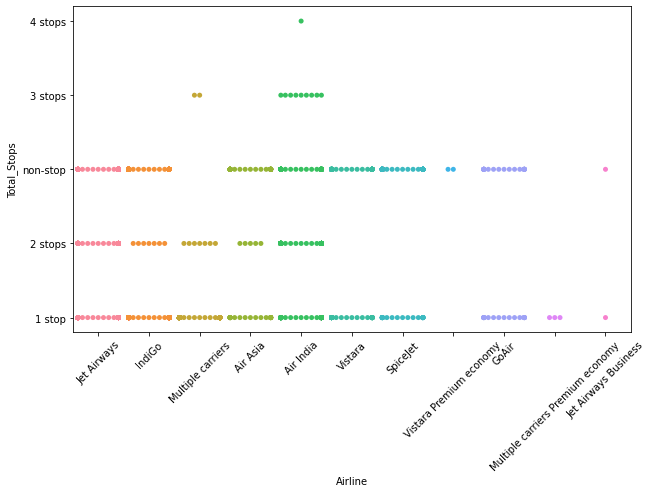

In [99]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Airline',y='Total_Stops',data=df_test)
plt.xticks(rotation=45)

Majority of the airline has one stop and non_stop.Jet airways buisness has non-stop.Multiple carries and air india  has 3 stops.
Air india is the only airline having 4 stops.

<AxesSubplot:>

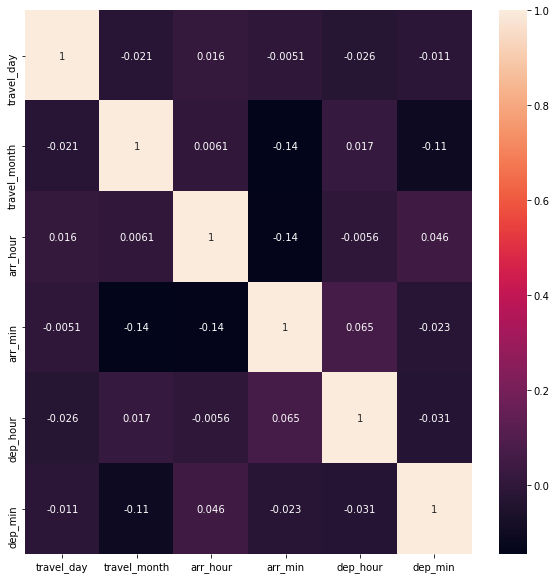

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(df_test.corr(),annot=True)

There is no multicollinearity exists.

travel_day         AxesSubplot(0.125,0.125;0.110714x0.755)
travel_month    AxesSubplot(0.257857,0.125;0.110714x0.755)
arr_hour        AxesSubplot(0.390714,0.125;0.110714x0.755)
arr_min         AxesSubplot(0.523571,0.125;0.110714x0.755)
dep_hour        AxesSubplot(0.656429,0.125;0.110714x0.755)
dep_min         AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

<Figure size 2160x0 with 0 Axes>

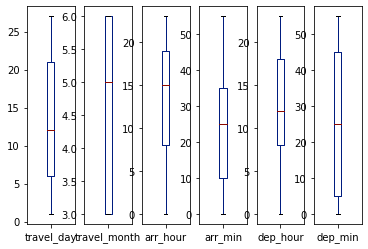

In [101]:
plt.figure(figsize=(30,0))
df_test.plot(kind ='box',subplots = True,sharex = False)

Thus we see no outliers are there in test dataset.

<AxesSubplot:>

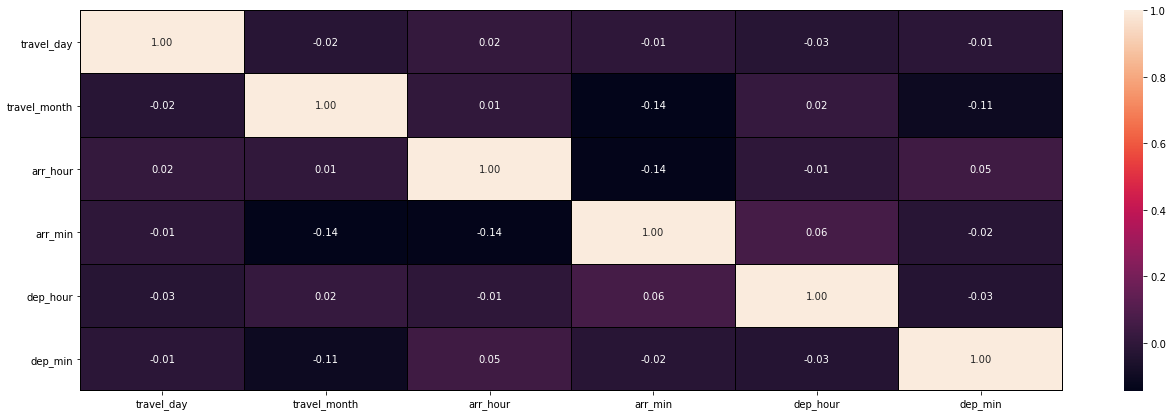

In [102]:
plt.figure(figsize=(22,7))
sns.heatmap(df_test.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

Thus we see that there is no multicollinearity exists

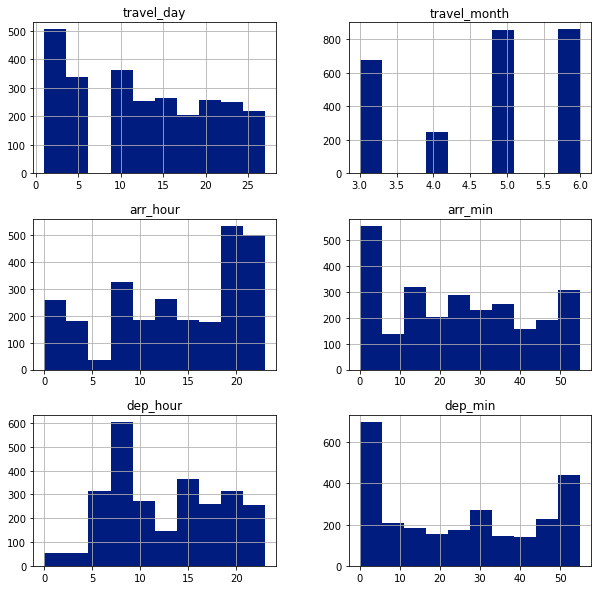

In [103]:
plt.style.use('seaborn-dark-palette')
df_test.hist(figsize=(10,10))
plt.show()

Thus we can see majority is not normally distributed.

In [104]:
df_train.skew()

Airline            0.723590
Source            -0.420046
Destination        1.225716
Total_Stops        0.617671
Additional_Info   -1.796195
Price              1.857318
travel_day         0.124669
travel_month      -0.377971
dep_hour           0.108428
dep_min            0.171131
arr_hour          -0.379185
arr_min            0.110459
dtype: float64

# Splitting the dataset into 2 variables namely 'x' and 'y' for features and label for model building

In [105]:
x = df_train.drop('Price', axis=1)
y = df_train['Price']

In [106]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,travel_day,travel_month,dep_hour,dep_min,arr_hour,arr_min
0,3.0,0.0,5.0,4.0,8.0,24,3,22,20,1,10
1,1.0,3.0,0.0,1.0,8.0,1,5,5,50,13,15
2,4.0,2.0,1.0,1.0,8.0,9,6,9,25,4,25
3,3.0,3.0,0.0,0.0,8.0,12,5,18,5,23,30
4,3.0,0.0,5.0,0.0,8.0,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,4.0,8.0,9,4,19,55,22,25
10679,1.0,3.0,0.0,4.0,8.0,27,4,20,45,23,20
10680,4.0,0.0,2.0,4.0,8.0,27,4,8,20,11,20
10681,10.0,0.0,5.0,4.0,8.0,1,3,11,30,14,10


In [107]:
#removing skewness
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.30004635, -1.59165288,  1.74466551, ...,  0.02606596,
        -1.79374726, -0.7738723 ],
       [-1.42002777,  0.89254014, -1.35867302, ...,  1.17650927,
        -0.06431213, -0.4311779 ],
       [ 0.14151629, -0.01262402,  0.00702469, ...,  0.25789864,
        -1.36936647,  0.15644991],
       ...,
       [ 0.14151629, -1.59165288,  0.7038724 , ...,  0.02606596,
        -0.35688477, -0.12490229],
       [ 2.11032782, -1.59165288,  1.74466551, ...,  0.46849015,
         0.08237663, -0.7738723 ],
       [-1.42002777, -0.01262402,  0.00702469, ...,  1.33051394,
         0.8192163 , -0.4311779 ]])

# Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
X_features=x
x=StandardScaler().fit_transform(x)

# Finding the best random state for Regression Models


In [110]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.33041818222374164 on Random State 261


Thus we see the best random state is 261 where the accuracy score is 33%

In [111]:
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33,random_state=261)
#random state at 171 taken as training and testing accuracy are same

In [113]:
x_train.shape

(7008, 11)

In [114]:
#training the model
lr.fit(x_train,y_train)

LinearRegression()

In [115]:
#predicting train
pred_train=lr.predict(x_train)
pred_train

array([ 4590.52124044, 10891.25971971,  7862.00677425, ...,
       11596.88652512, 11795.2843158 ,  5159.39913801])

In [116]:
#predicting y_test
pred_test=lr.predict(x_test)
pred_test

array([10371.94963358, 12331.39635478, 11950.254084  , ...,
        5442.47605177,  8483.21220591,  6346.69471926])

In [117]:
print(r2_score(y_test,pred_test)*100)

33.04181822237416


# cross_validation of the model

In [118]:
 Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold :",j)
    print("The CV score is :",cv_mean)
    print("The accuracy score for training :",Train_accuracy)
    print("The accuracy score for testing :",Test_accuracy)
    print("\n")

At cross fold : 2
The CV score is : 0.2847918767154741
The accuracy score for training : 0.26913664748844823
The accuracy score for testing : 0.33041818222374164


At cross fold : 3
The CV score is : 0.28568278066878383
The accuracy score for training : 0.26913664748844823
The accuracy score for testing : 0.33041818222374164


At cross fold : 4
The CV score is : 0.28548958455444934
The accuracy score for training : 0.26913664748844823
The accuracy score for testing : 0.33041818222374164


At cross fold : 5
The CV score is : 0.2855012493736633
The accuracy score for training : 0.26913664748844823
The accuracy score for testing : 0.33041818222374164


At cross fold : 6
The CV score is : 0.28618402322718606
The accuracy score for training : 0.26913664748844823
The accuracy score for testing : 0.33041818222374164


At cross fold : 7
The CV score is : 0.2858184096748056
The accuracy score for training : 0.26913664748844823
The accuracy score for testing : 0.33041818222374164


At cross fold

Taking cv=5 where cross validation score is 29% and the gap of accuracy score  for training and testing is less. 

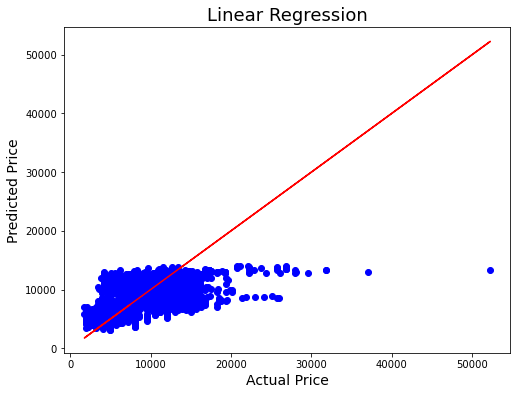

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Price",fontsize=14)
plt.ylabel("Predicted Price",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints ,we can improve more by regularization and hyperparameter technique. There are some datapoints far away from best fit line,which can increase the mse error so we need to regularise and improve the r2_score.

In [120]:
#testing the model
lr.score(x_test,y_test)

0.33041818222374164

In [121]:
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error :",mean_squared_error(y_test,pred_test))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,pred_test)))
print("R2_Score",r2_score(y_test,pred_test))

Mean absolute error : 2792.8289239113947
Mean squared error : 12857599.669700999
Root mean error : 3585.7495269052188
R2_Score 0.33041818222374164


Thus we see errors are in the higher side so we wont use this our best fit model.

# REGULARIZATION (LASSO AND RIDGE)

In [122]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [123]:
rdg=Ridge(alpha=0.001,random_state=261)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.26913664748844157

In [124]:
#Lasso model training
ls=Lasso(alpha= 0.1, random_state= 261)
ls.fit(x_train,y_train)   
ls_score_training=ls.score(x_train,y_train) 
pred_ls=ls.predict(x_test) 
ls_score_training*100 

26.913664096832633

In [125]:
predict=rdg.predict(x_test)

In [126]:
r2_score(y_test,predict)

0.3304181812129937

Thus the accuracy score using ridge method is 33%

In [127]:
lso=Lasso(alpha=0.0001,random_state=261)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.2691366474884418

In [128]:
predict1=lso.predict(x_test)
predict1

array([10371.94906778, 12331.3960257 , 11950.25366855, ...,
        5442.47694221,  8483.2117614 ,  6346.69535216])

In [129]:
r2_score(y_test,predict1)

0.3304181863649306

Thus the accuracy score using ridge method is 33%.Both ridege and lasso method accuracy score is same.

# Finding the best model

We will be using LinearRegression, SVR, DecisionTreeRegressor ,KNeighborsRegressor ,RandomForestRegressor, GradientBoostingRegressor algorithms for finding out the best model among those

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [131]:
LR=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
ada=AdaBoostRegressor()

In [132]:
models= []
models.append(('Linear Regression',LR))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rfr))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))

In [133]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [134]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)     
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


accuracy_score:  0.33041818222374164


cross_val_score:  0.2855012493736633


Root Mean Squared Error:  3585.7495269052188



****************************** Support Vector Regressor ***************************


SVR()


accuracy_score:  0.0023737828515562054


cross_val_score:  0.003248860856303737


Root Mean Squared Error:  4376.8539055872



****************************** Decision Tree Regressor ***************************


DecisionTreeRegressor()


accuracy_score:  0.8368373280160548


cross_val_score:  0.8089244428514146


Root Mean Squared Error:  1770.0622016981367



****************************** KNeighbors Regressor ***************************


KNeighborsRegressor()


accuracy_score:  0.7429421925737388


cross_val_score:  0.7589808105428558


Root Mean Squared Error:  2221.7414790609278



****************************** RandomForestRegressor ***************************


Ran

In [135]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'Root_Mean_Squared_error':rmse})
result

,Model,Accuracy_score,Cross_val_score,Root_Mean_Squared_error
0,Linear Regression,33.041818,28.550125,3585.749527
1,Support Vector Regressor,0.237378,0.324886,4376.853906
2,Decision Tree Regressor,83.683733,80.892444,1770.062202
3,KNeighbors Regressor,74.294219,75.898081,2221.741479
4,RandomForestRegressor,90.360640,88.741282,1360.511511
5,GradientBoostingRegressor,82.666996,80.989541,1824.378913
6,AdaBoostRegressor,33.776100,40.338700,3566.034165


Thus we see that support vector regressor showing very poor result .Out of all the models,Random forest Regressor is showing  good accuracy of 90.5% and cross validation score of 88.66% with less rmse error and also Decision Tree Regressor  showing accuracy score of 83.68% and cross validation score is 80.89% with rmse error of 1770.06,We choose Random forest regressor as our best fit model for Hyperparameter Tuning as the accurcay score and cross validation score is very good and with less rmse error. 

# Hyperparameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
parameters= {'n_estimators': [100, 150,200],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[2,3,4],
             'max_depth' : [2,3,3],
}
rfr=RandomForestRegressor(random_state=261)
GCVr=GridSearchCV(rfr,parameters,cv=5,scoring='accuracy')
GCVr.fit(x_train,y_train)
print(GCVr.best_params_)#Printing the best parameters obtained

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [137]:
rfr=RandomForestRegressor(max_depth=2,min_samples_leaf=2,min_samples_split=2,n_estimators=100)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rfr,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 49.18273711934232
Cross Val Score: 44.06818289899944


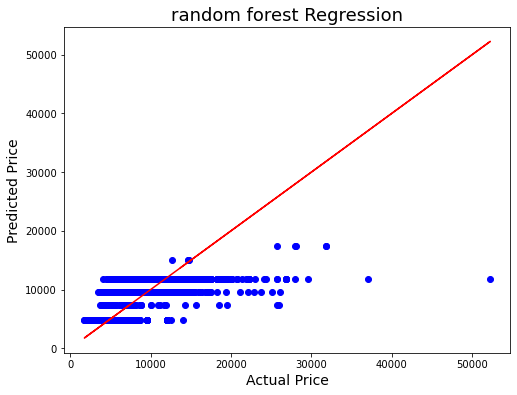

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Price",fontsize=14)
plt.ylabel("Predicted Price",fontsize=14)
plt.title("random forest Regression",fontsize=18)
plt.show()

This is the best fit line after hypertuning covering the datapoints as shown in figure above.

# Saving the model :Random Forest Regressor :Best Model

In [139]:
import pickle
filename='flight_prediction.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [140]:
x_train.shape

(7008, 11)

# Conclusion :Prediction Test

In [141]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,travel_day,travel_month,arr_hour,arr_min,dep_hour,dep_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,No info,6,6,20,25,20,30
2667,IndiGo,Kolkata,Banglore,non-stop,No info,27,3,16,55,14,20
2668,Jet Airways,Delhi,Cochin,1 stop,No info,6,3,4,25,21,50
2669,Air India,Delhi,Cochin,1 stop,No info,6,3,19,15,4,0


In [142]:
x.shape,df_test.shape

((10460, 11), (2642, 11))

In [143]:
oe=OrdinalEncoder()
def ordinal_encoder(df, col):
    df[col]=oe.fit_transform(df[col])
    return df

df_test=ordinal_encoder(df_test,['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'])

In [144]:
df_test #validating the changes of ordinal encoder

,Airline,Source,Destination,Total_Stops,Additional_Info,travel_day,travel_month,arr_hour,arr_min,dep_hour,dep_min
0,4.0,2.0,1.0,0.0,5.0,6,6,4,25,17,30
1,3.0,3.0,0.0,0.0,5.0,12,5,10,20,6,20
2,4.0,2.0,1.0,0.0,3.0,21,5,19,0,19,15
3,6.0,2.0,1.0,0.0,5.0,21,5,21,0,8,0
4,0.0,0.0,2.0,4.0,5.0,24,6,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,0.0,5.0,6,6,20,25,20,30
2667,3.0,3.0,0.0,4.0,5.0,27,3,16,55,14,20
2668,4.0,2.0,1.0,0.0,5.0,6,3,4,25,21,50
2669,1.0,2.0,1.0,0.0,5.0,6,3,19,15,4,0


In [145]:
loaded_model=pickle.load(open('flight_prediction.pkl','rb'))

In [146]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler
df_test=ss().fit_transform(df_test)

# Prediction Results

In [147]:
conclusion=pd.DataFrame([loaded_model.predict(df_test)]).T
conclusion

,0
0,11768.987139
1,9519.074761
2,17346.552726
3,11768.987139
4,4837.241672
...,...
2637,9519.074761
2638,4811.936143
2639,11768.987139
2640,9519.074761
